In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-4.245180636782237, -71.55937917075757),
 (44.55235211908982, 91.78937397221608),
 (54.51425562976249, -92.89126528538209),
 (-69.09253584303282, 40.31536110655546),
 (64.38295451884784, 39.84595057635448),
 (89.06645143337289, 98.5567327469393),
 (81.17016800705395, 6.988950776002099),
 (-89.30588619251508, 149.9568532108783),
 (-59.402466681221256, -150.31201562908552),
 (-38.16792110761682, -102.51582545031715),
 (-46.04720796523156, 21.15678803339972),
 (-30.63448512595224, 155.14493020663753),
 (-23.281855868342717, 7.7987896445253),
 (-22.732183527974954, 166.2102509878161),
 (-36.18755941063855, -22.205997303497213),
 (-60.50987465029783, 174.61054409522893),
 (-34.92095141109554, 41.94590300348517),
 (18.19527007067032, 10.301495722145063),
 (74.62638381309642, 164.6581206209758),
 (36.89317821554637, 16.187379064220067),
 (-72.47232014648516, 105.4534295853502),
 (66.76537127659779, -57.448613465051736),
 (14.114860927603004, 131.43654335210198),
 (-34.54816675741333, 83.091

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8a6343d9724072f19e4ad863aa1d635


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8a6343d9724072f19e4ad863aa1d635&q=Boston


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto narino
Processing Record 2 of Set 1 | hami
Processing Record 3 of Set 1 | sioux lookout
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | severodvinsk
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | coffs harbour
Processing Record 13 of Set 1 | henties bay
Processing Record 14 of Set 1 | noumea
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | beloha
Processing Record 18 of Set 1 | agadez
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | syracuse
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | sisimiu

Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | ambunti
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | ushtobe
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | waipawa
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | vallenar
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | mandalgovi
Processing Record 4 of Set 5 | ust-bolsheretsk
City not found. Skipping...
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | kalmunai
Processing Record 7 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 8 of Set 5 | xining
Processing Record 9 of Set 5 | najran
Processing Record 10 of Set 5 | tigil
Processing Record 11 of Set 5 | yeletskiy
City not found. Skipping...
Processing Record 12 of Set 5 | alice springs
Processing Record 13 of Set 5 | leningradskiy

Processing Record 32 of Set 8 | codrington
Processing Record 33 of Set 8 | shirokiy
Processing Record 34 of Set 8 | rio gallegos
Processing Record 35 of Set 8 | grindavik
Processing Record 36 of Set 8 | marsh harbour
Processing Record 37 of Set 8 | atambua
Processing Record 38 of Set 8 | kalabagh
Processing Record 39 of Set 8 | kupang
Processing Record 40 of Set 8 | mahibadhoo
Processing Record 41 of Set 8 | bereda
Processing Record 42 of Set 8 | kathu
Processing Record 43 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 44 of Set 8 | pochutla
Processing Record 45 of Set 8 | silifke
Processing Record 46 of Set 8 | nagato
Processing Record 47 of Set 8 | tessaoua
Processing Record 48 of Set 8 | pokhara
Processing Record 49 of Set 8 | broken hill
Processing Record 50 of Set 8 | wuda
Processing Record 1 of Set 9 | sitka
Processing Record 2 of Set 9 | del rio
Processing Record 3 of Set 9 | biak
Processing Record 4 of Set 9 | attawapiskat
City not found. Skipping...
Proces

Processing Record 19 of Set 12 | faro
Processing Record 20 of Set 12 | walvis bay
Processing Record 21 of Set 12 | omboue
Processing Record 22 of Set 12 | chara
Processing Record 23 of Set 12 | bubaque
Processing Record 24 of Set 12 | beringovskiy
Processing Record 25 of Set 12 | pio ix
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | oranjemund
Processing Record 28 of Set 12 | lerwick
Processing Record 29 of Set 12 | genhe
Processing Record 30 of Set 12 | buqayq
City not found. Skipping...
Processing Record 31 of Set 12 | tete
Processing Record 32 of Set 12 | marrakesh
Processing Record 33 of Set 12 | nagold
Processing Record 34 of Set 12 | indiana
Processing Record 35 of Set 12 | lisala
Processing Record 36 of Set 12 | manggar
Processing Record 37 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 38 of Set 12 | erzin
Processing Record 39 of Set 12 | jahrom
City not found. Skipping...
Processing Record 40 of Set 12 | broome
Processing Reco

In [32]:
len(city_data)

572

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Narino,-3.7703,-70.3831,67.57,97,100,2.28,CO,2022-05-19 03:29:47
1,Hami,42.8000,93.4500,83.70,14,50,8.79,CN,2022-05-19 03:29:47
2,Sioux Lookout,50.1001,-91.9170,46.47,93,75,4.61,CA,2022-05-19 03:29:48
3,Port Alfred,-33.5906,26.8910,62.19,83,65,1.99,ZA,2022-05-19 03:29:48
4,Severodvinsk,64.5635,39.8302,37.51,89,100,12.30,RU,2022-05-19 03:29:48
5,Khatanga,71.9667,102.5000,32.95,99,100,4.50,RU,2022-05-19 03:29:49
6,Bluff,-46.6000,168.3333,52.81,70,54,29.15,NZ,2022-05-19 03:29:49
7,Mataura,-46.1927,168.8643,52.48,61,15,11.59,NZ,2022-05-19 03:29:50
8,Lebu,-37.6167,-73.6500,51.91,86,100,16.02,CL,2022-05-19 03:29:50
9,Bredasdorp,-34.5322,20.0403,57.61,70,98,15.55,ZA,2022-05-19 03:28:10


In [13]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Narino,CO,2022-05-19 03:29:47,-3.7703,-70.3831,67.57,97,100,2.28
1,Hami,CN,2022-05-19 03:29:47,42.8000,93.4500,83.70,14,50,8.79
2,Sioux Lookout,CA,2022-05-19 03:29:48,50.1001,-91.9170,46.47,93,75,4.61
3,Port Alfred,ZA,2022-05-19 03:29:48,-33.5906,26.8910,62.19,83,65,1.99
4,Severodvinsk,RU,2022-05-19 03:29:48,64.5635,39.8302,37.51,89,100,12.30
5,Khatanga,RU,2022-05-19 03:29:49,71.9667,102.5000,32.95,99,100,4.50
6,Bluff,NZ,2022-05-19 03:29:49,-46.6000,168.3333,52.81,70,54,29.15
7,Mataura,NZ,2022-05-19 03:29:50,-46.1927,168.8643,52.48,61,15,11.59
8,Lebu,CL,2022-05-19 03:29:50,-37.6167,-73.6500,51.91,86,100,16.02
9,Bredasdorp,ZA,2022-05-19 03:28:10,-34.5322,20.0403,57.61,70,98,15.55


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/18/22'

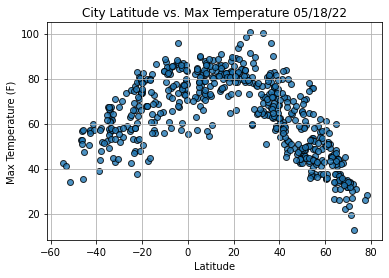

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

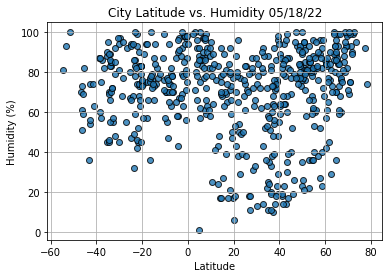

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

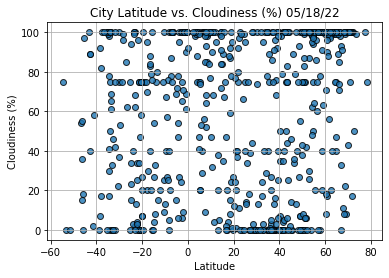

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

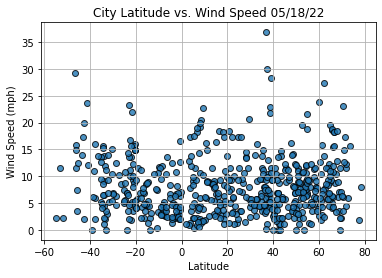

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13


City            Sao Joao Da Barra
Country                        BR
Date          2022-05-19 03:28:59
Lat                      -21.6403
Lng                      -41.0511
Max Temp                    63.16
Humidity                       45
Cloudiness                      0
Wind Speed                  21.88
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Narino,CO,2022-05-19 03:29:47,-3.7703,-70.3831,67.57,97,100,2.28
3,Port Alfred,ZA,2022-05-19 03:29:48,-33.5906,26.8910,62.19,83,65,1.99
6,Bluff,NZ,2022-05-19 03:29:49,-46.6000,168.3333,52.81,70,54,29.15
7,Mataura,NZ,2022-05-19 03:29:50,-46.1927,168.8643,52.48,61,15,11.59
8,Lebu,CL,2022-05-19 03:29:50,-37.6167,-73.6500,51.91,86,100,16.02


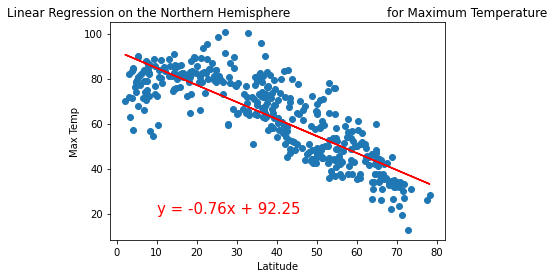

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

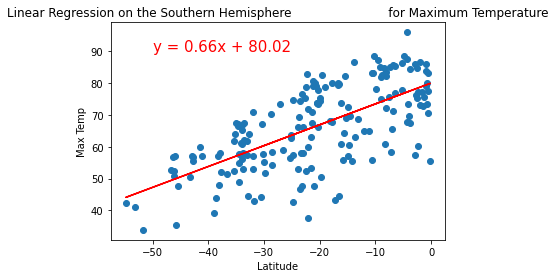

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

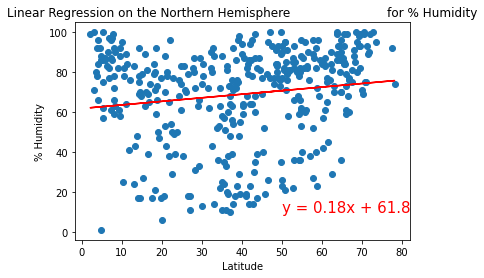

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(50,10))

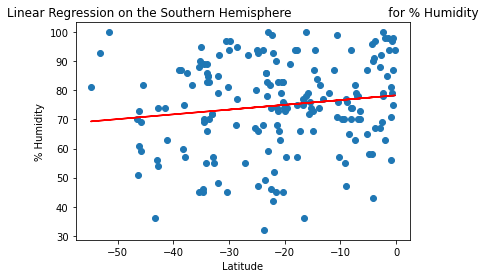

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

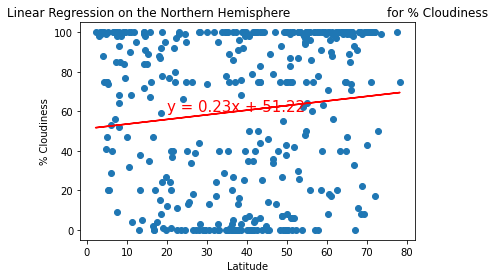

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,60))

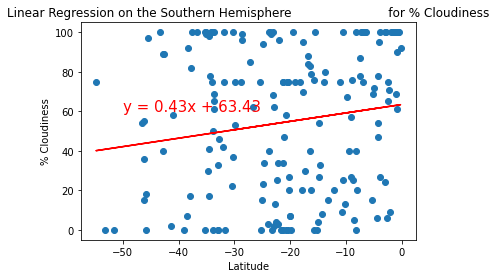

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

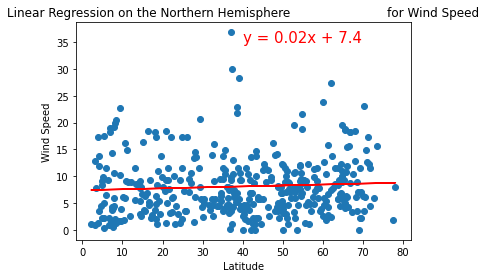

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

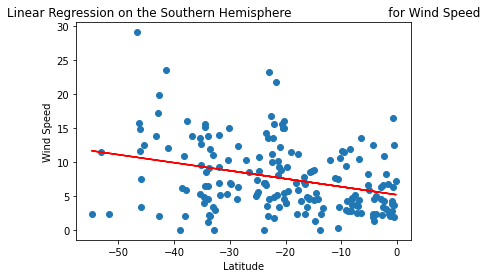

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))